# A. Import & Preprocessing data

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')
df.head(10)

,Day,Month,Year,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          246 non-null    object
 1   Month        245 non-null    object
 2   Year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   WS           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Penghapusan Data Nan

In [4]:
df[df['Classes'].isna()]

,Day,Month,Year,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [5]:
df.dropna(inplace=True)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          244 non-null    object
 1   Month        244 non-null    object
 2   Year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   WS           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 28.6+ KB


# B. Visualisasi Data

## Histogram plot untuk melihat persebaran data

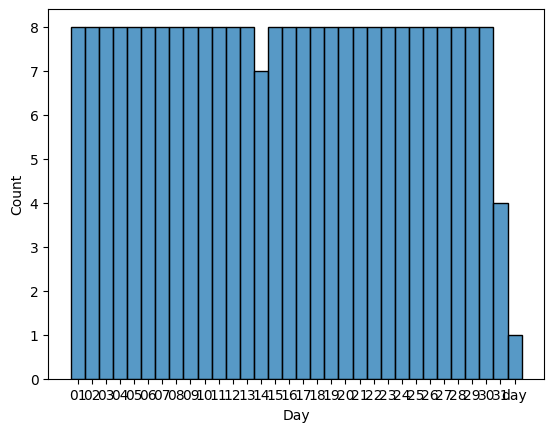

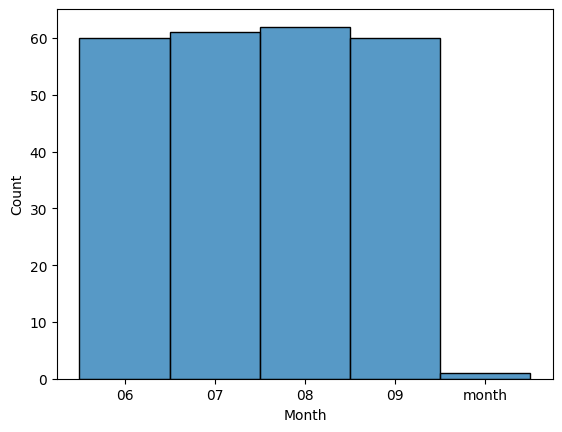

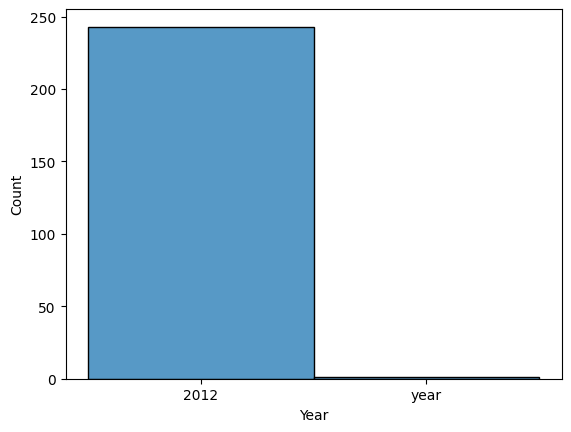

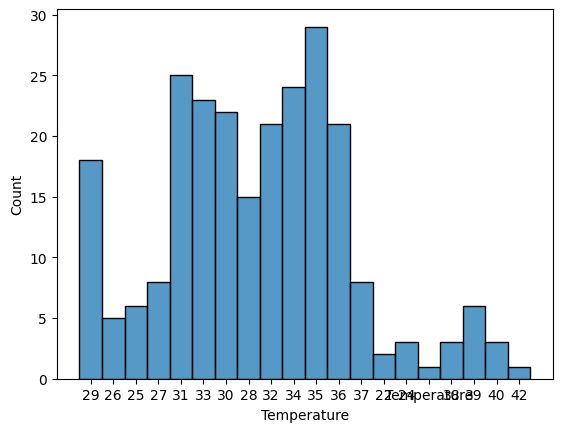

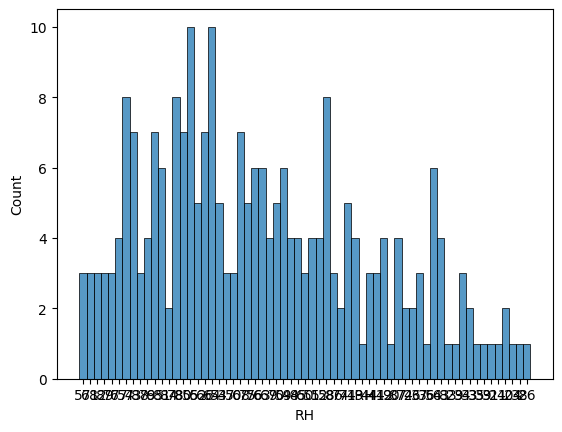

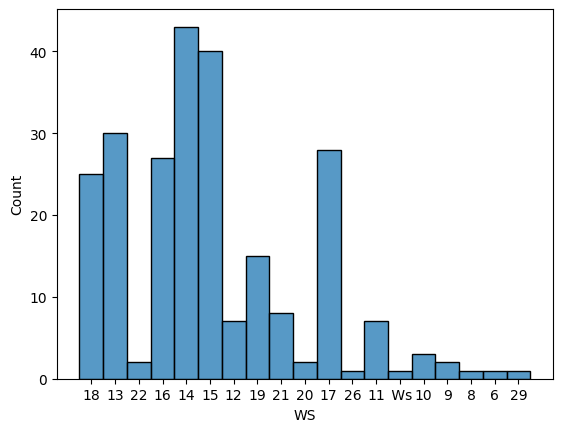

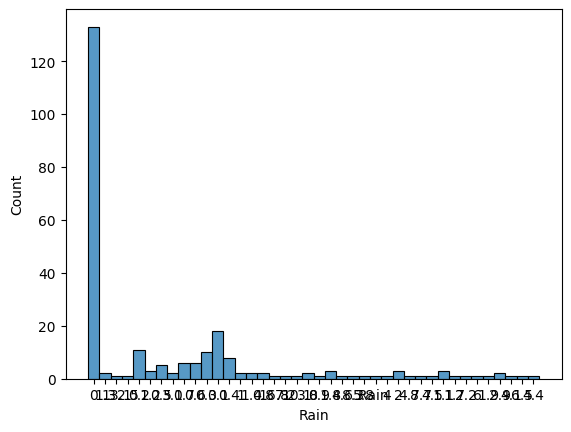

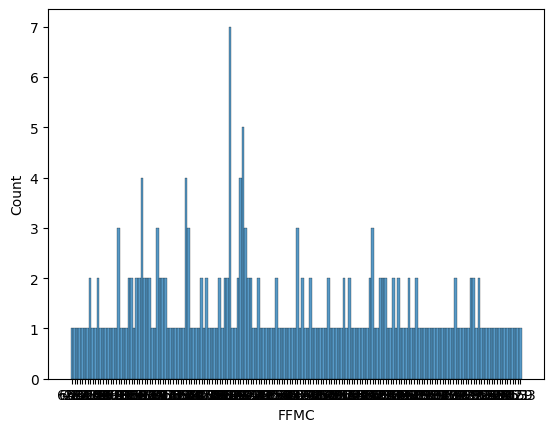

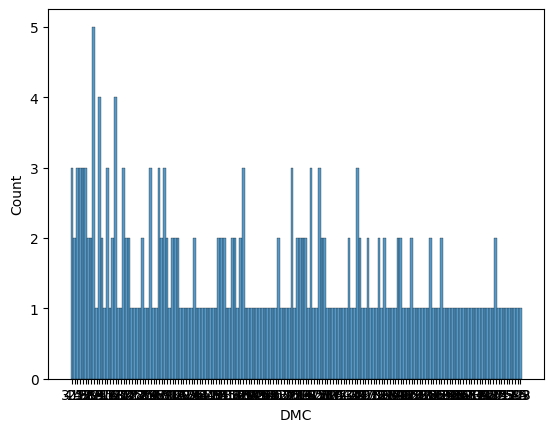

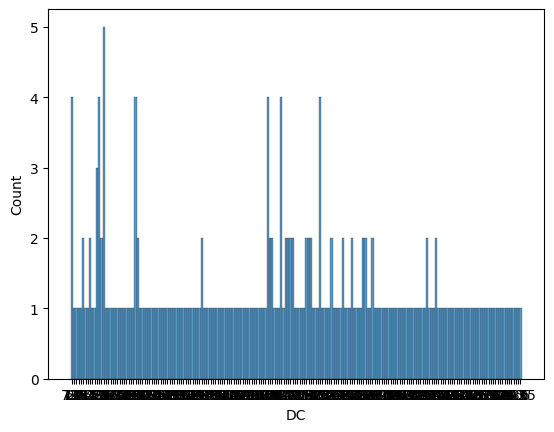

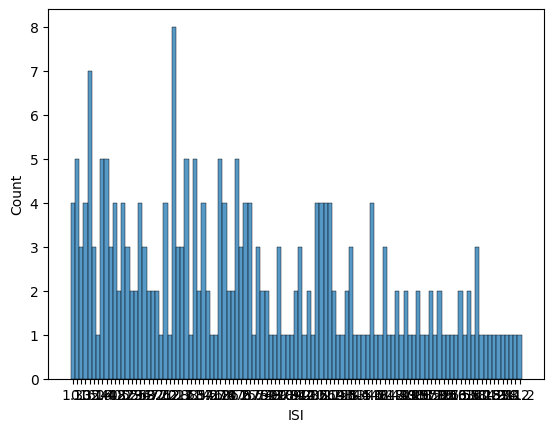

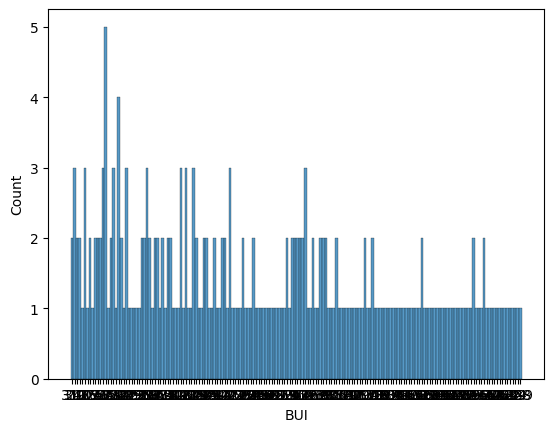

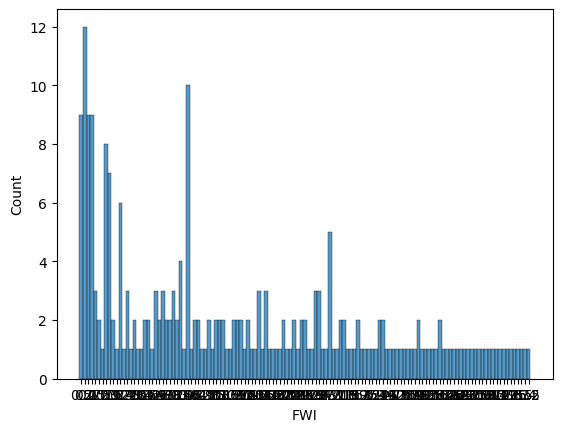

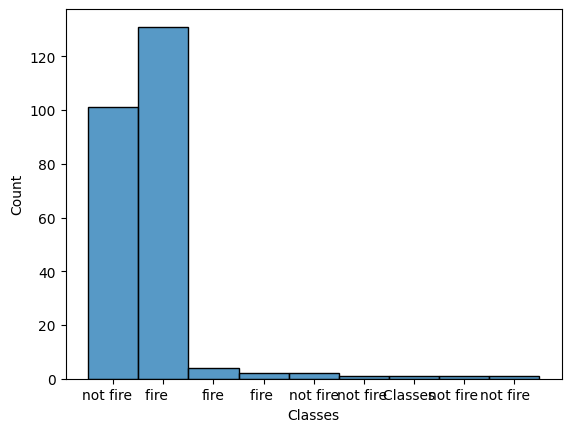

In [8]:
for i in df.columns:
    sns.histplot(df[i])
    plt.show()

## Dari data yang diberikan, ada kejanggalan yang perlu diperhatikan, yaitu:

### - terdapat duplikasi nama kolom di salah baris data, kemungkinan dari hasil melakukan update yang tidak dibersihkan
### - terdapat data numerik bertipe data objek karena duplikasi nama kolom pada salah satu baris data
### - di kolom target terdapat nilai yang sama namun tidak terdeteksi sebagai duplikasi (terlalu banyak whitespace)

### Mengatasi duplikasi nama kolom

In [9]:
df[df['Month'] == 'Month']

,Day,Month,Year,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [10]:
df.drop(index=123,inplace=True)

### Mengatasi data numerik yang bertipe data objek

In [11]:
df['Rain'].unique()

array(['0', '1.3', '13.1', '2.5', '0.2', '1.2', '0.5', '3.1', '0.7',
       '0.6', '0.3', '0.1', '0.4', '1', '1.4', '0.8', '16.8', '7.2',
       '10.1', '3.8', '0.9', '1.8', '4.6', '8.3', '5.8', '4', '2', '4.7',
       '8.7', '4.5', '1.1', '1.7', '2.2', '6', '1.9', '2.9', '4.1', '6.5',
       '4.4'], dtype=object)

In [12]:
df.columns

Index(['Day', 'Month', 'Year', 'Temperature', 'RH', 'WS', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [13]:
num_cols = ['Day', 'Month', 'Year', 'Temperature', 'RH', 'WS', 'Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']

for i in num_cols:
    df[i] = pd.to_numeric(df[i], errors='coerce')

In [14]:
df.isna().sum()

Day            0
Month          0
Year           0
Temperature    0
RH             0
WS             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [15]:
df['Rain'].unique()

array([ 0. ,  1.3, 13.1,  2.5,  0.2,  1.2,  0.5,  3.1,  0.7,  0.6,  0.3,
        0.1,  0.4,  1. ,  1.4,  0.8, 16.8,  7.2, 10.1,  3.8,  0.9,  1.8,
        4.6,  8.3,  5.8,  4. ,  2. ,  4.7,  8.7,  4.5,  1.1,  1.7,  2.2,
        6. ,  1.9,  2.9,  4.1,  6.5,  4.4])

### Mengatasi Whitespace pada kolom target (Classes)

In [16]:
df['Classes'] = df['Classes'].str.strip()

In [17]:
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

## Melakukan Visualisasi setelah menangani kejanggalan data

### Histplot (Mengecek persebaran data dalam bentuk bar plot) & Boxenplot (Mengecek persebaran data dalam bentuk box plot serta mengidentifikasi kemungkinan outlier)

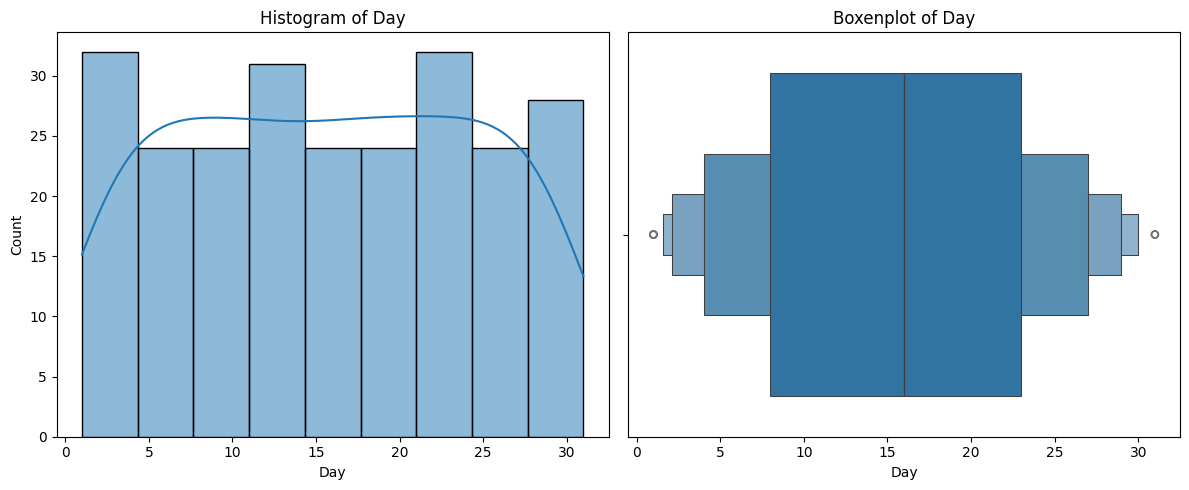

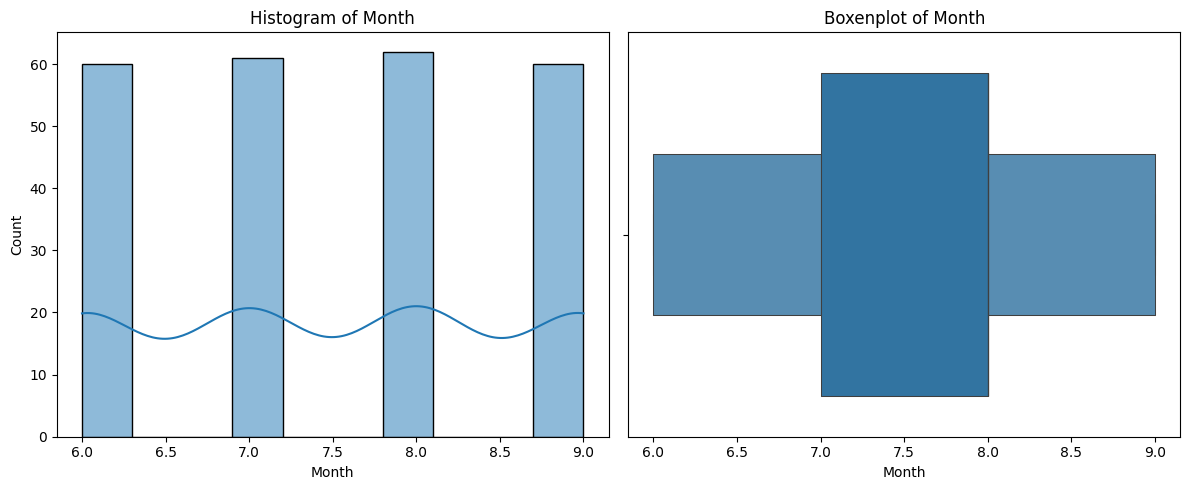

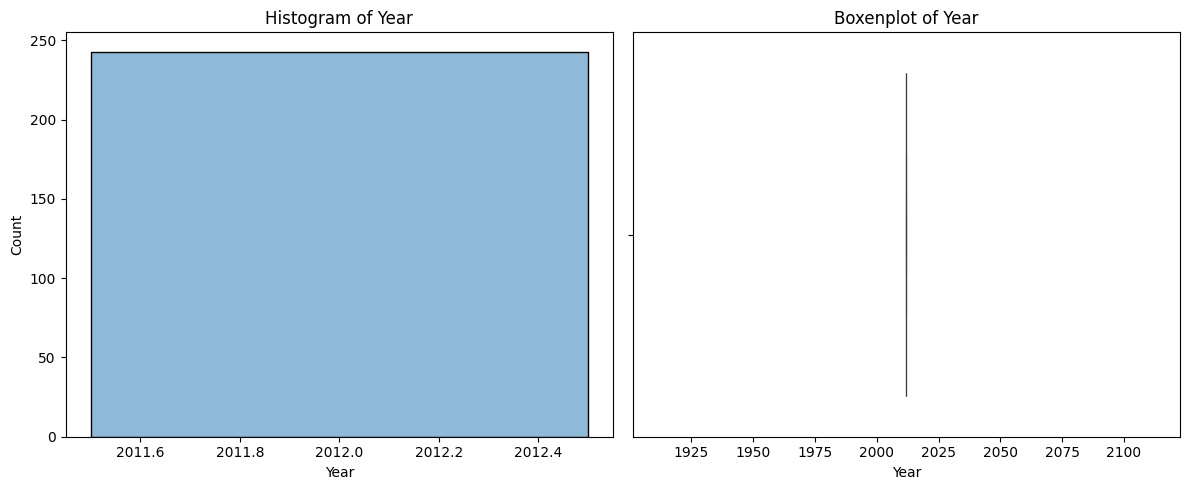

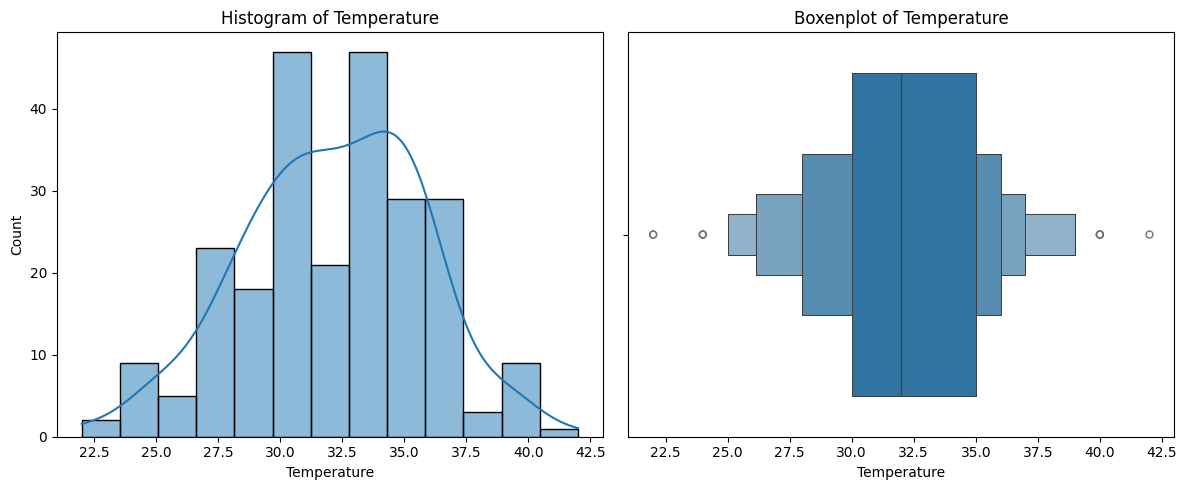

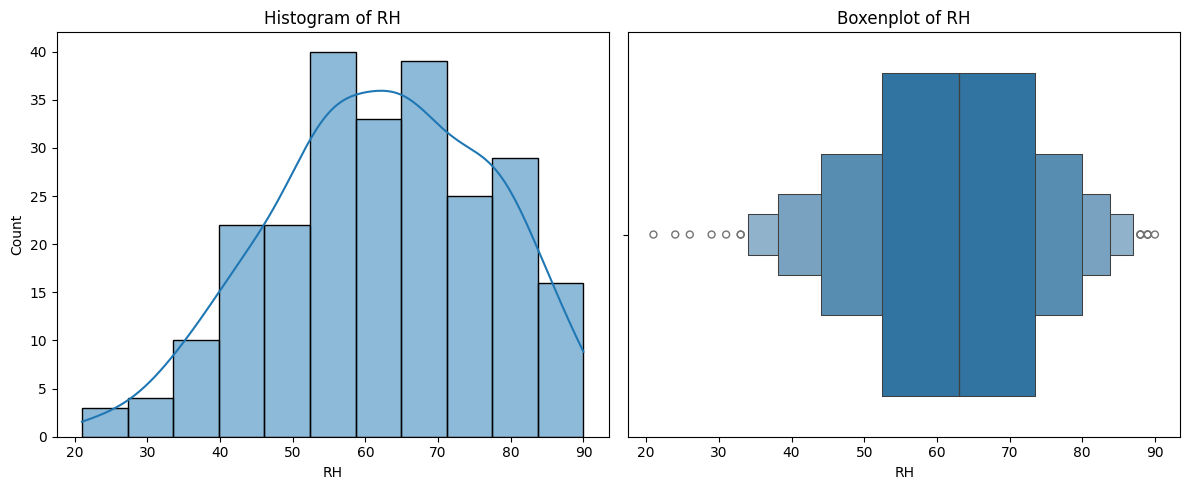

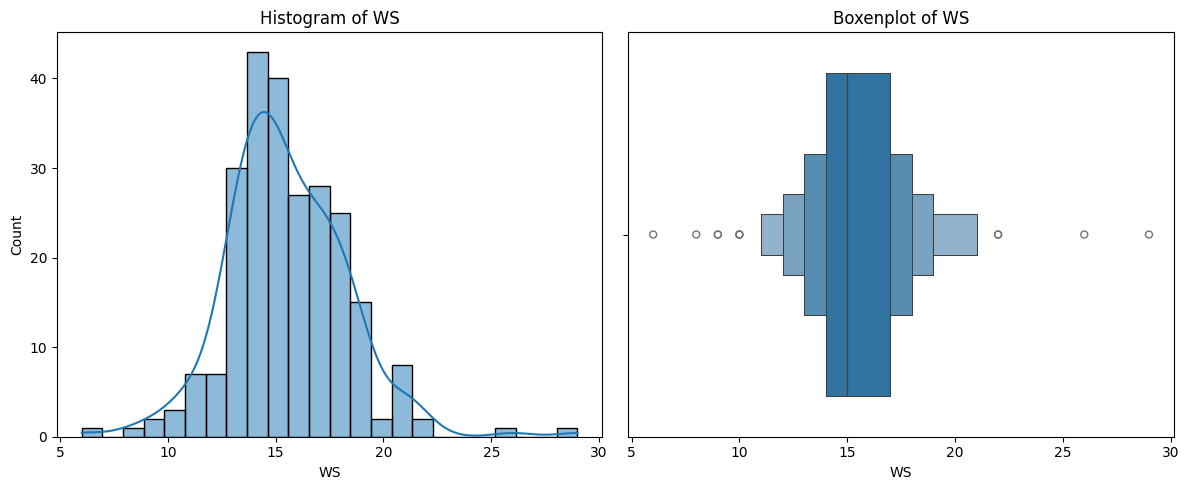

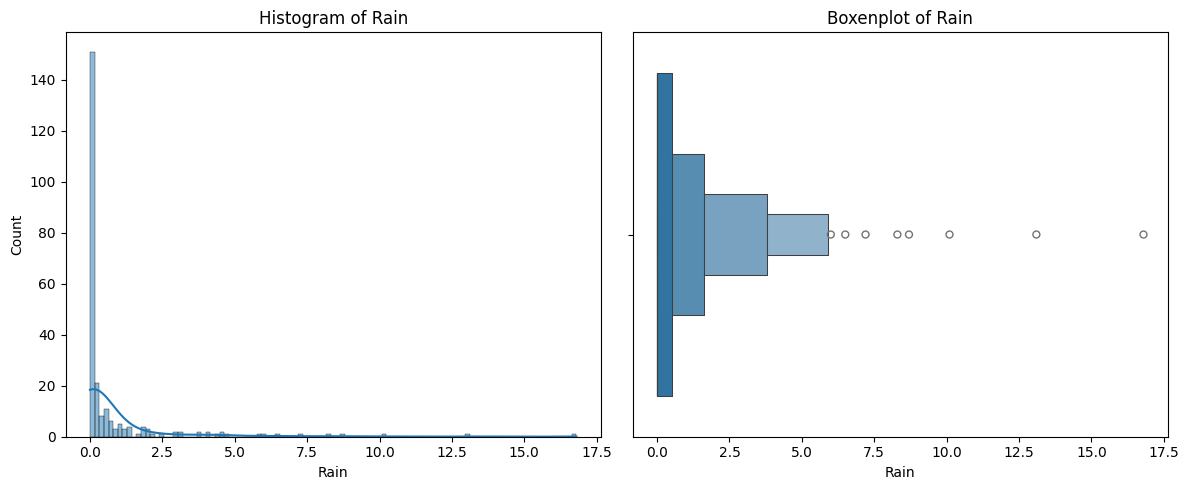

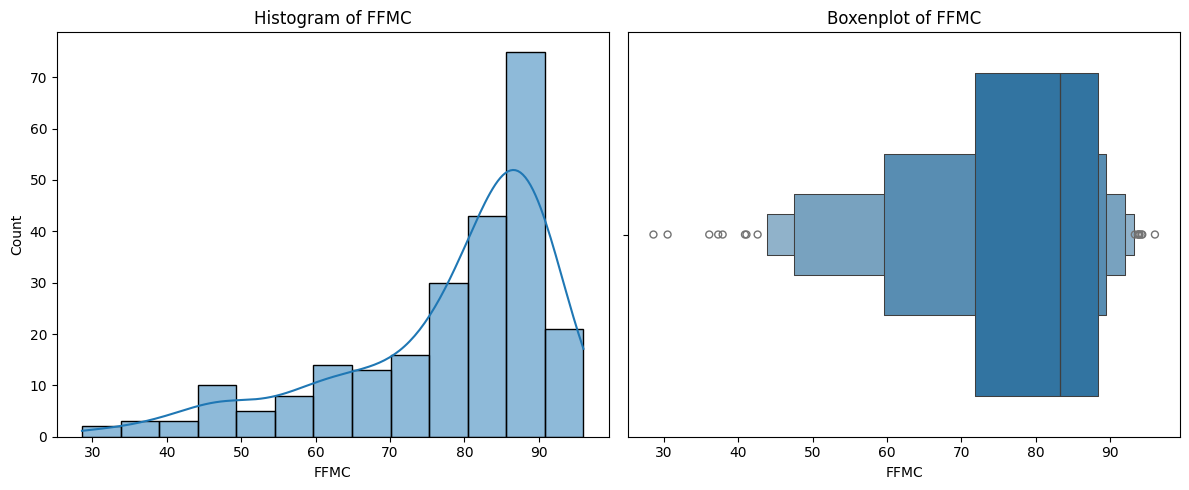

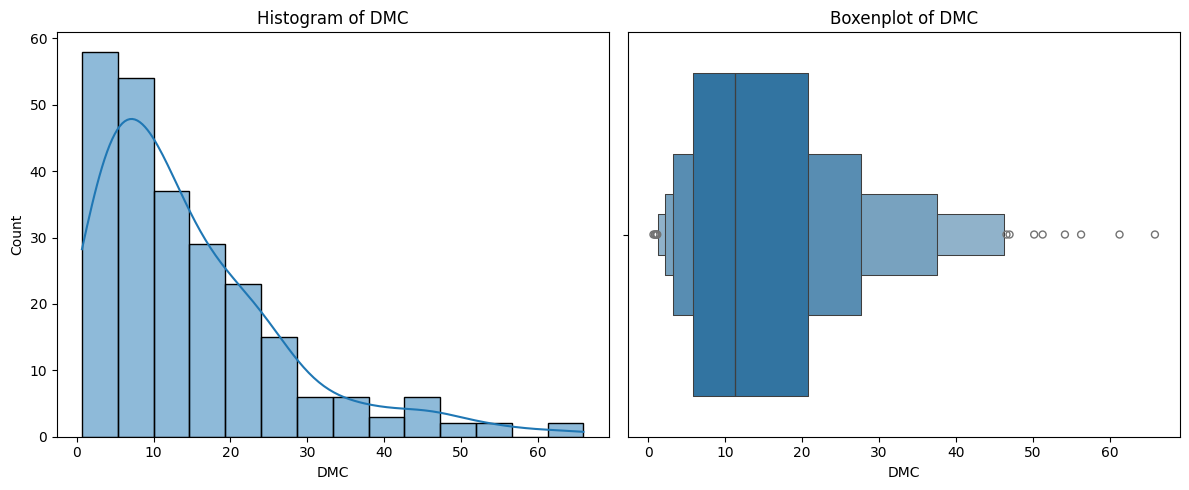

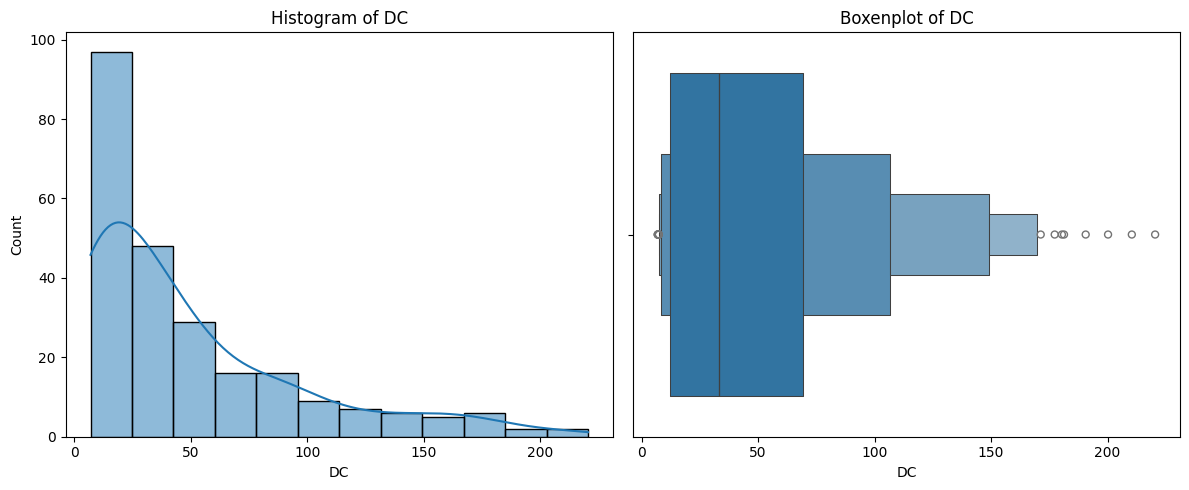

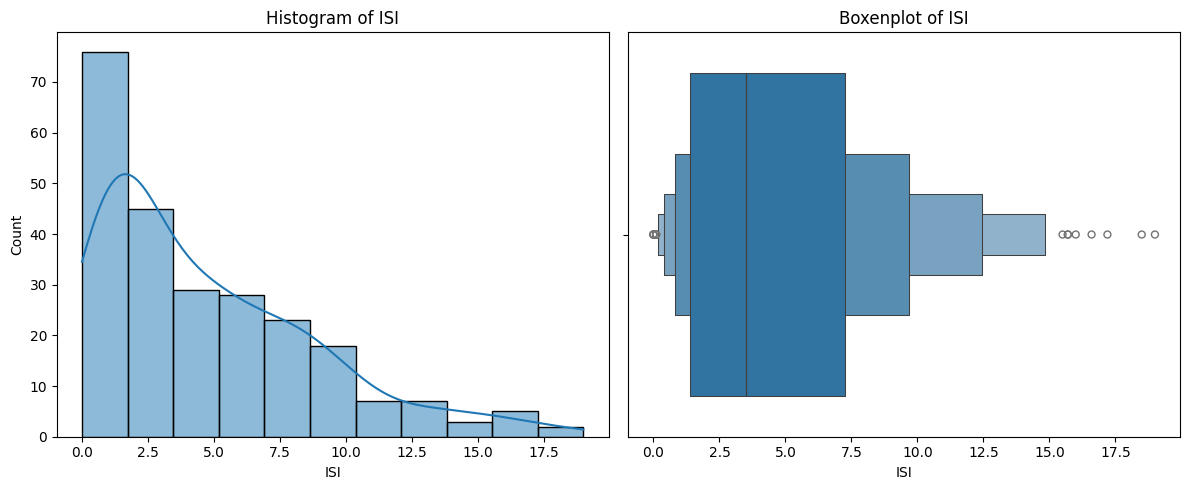

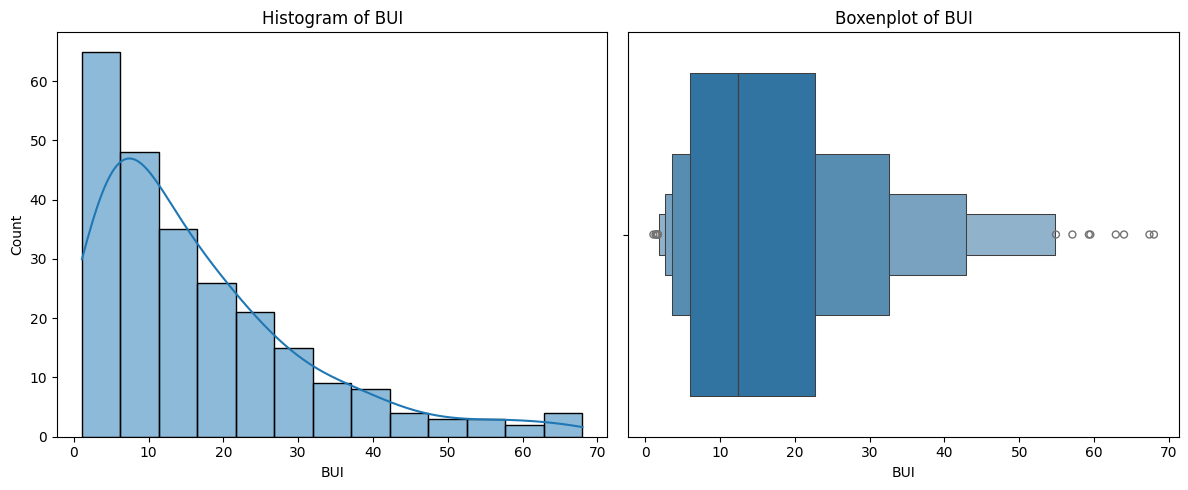

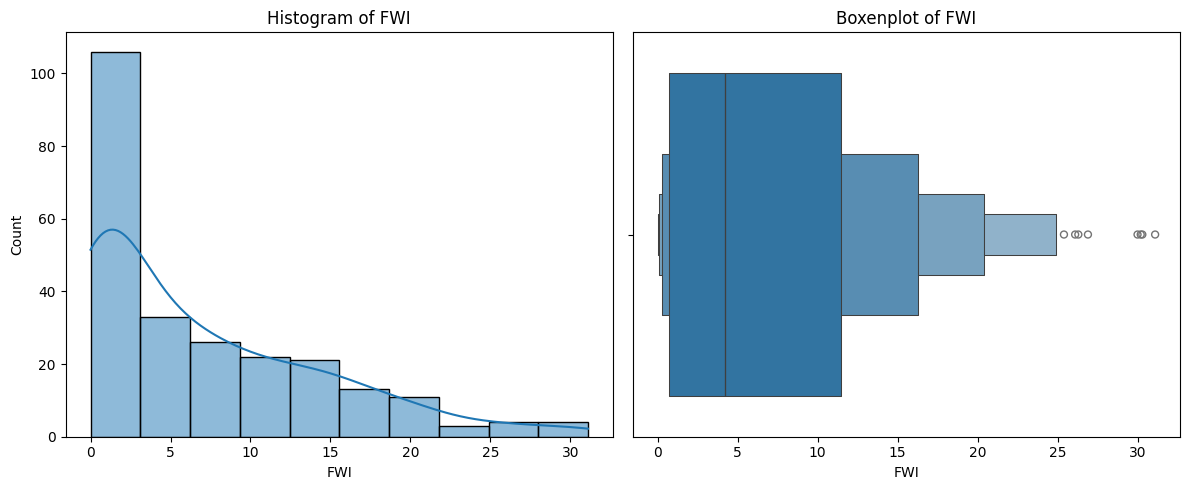

In [18]:
for i in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histogram
    sns.histplot(df[i], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {i}')
    
    # Boxenplot
    sns.boxenplot(x=df[i], ax=axes[1])
    axes[1].set_title(f'Boxenplot of {i}')

    plt.tight_layout()
    plt.show()

## Penghapusan Outlier dengan IQR

In [19]:
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lwr = q1 - 2.5 * iqr
    upr = q3 + 2.5 * iqr
    
    df.loc[(df[col] < lwr) | (df[col] > upr), col] = df[col].mean().astype(df[col].dtype)

### Kami melakukan penghapusan Outlier dengan rentang yang lebih besar (2.5 kali outlier) karena persebaran data beragam di semua kolom

### Dilakukan untuk hanya menghapus Outlier dan bukan data asli

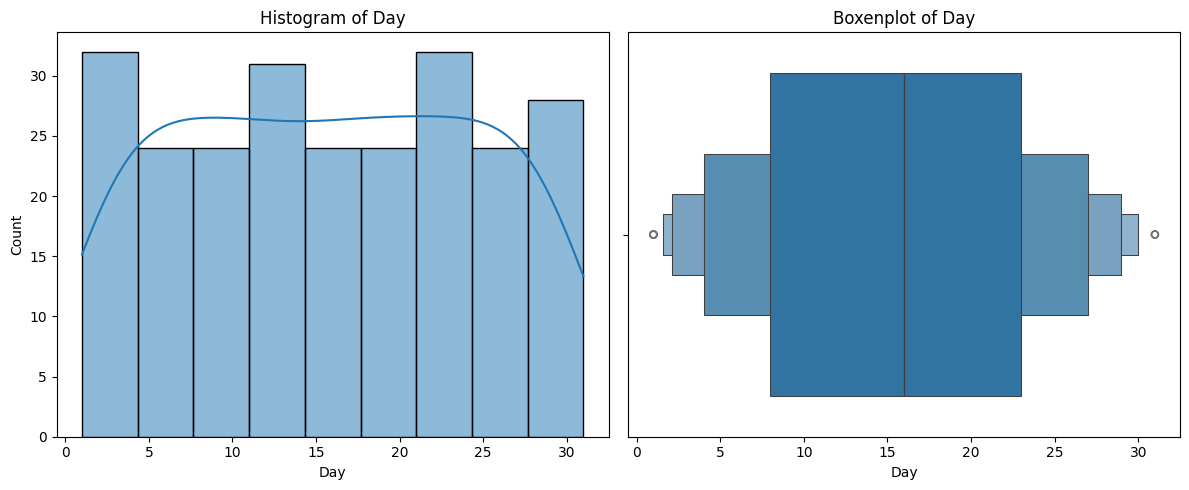

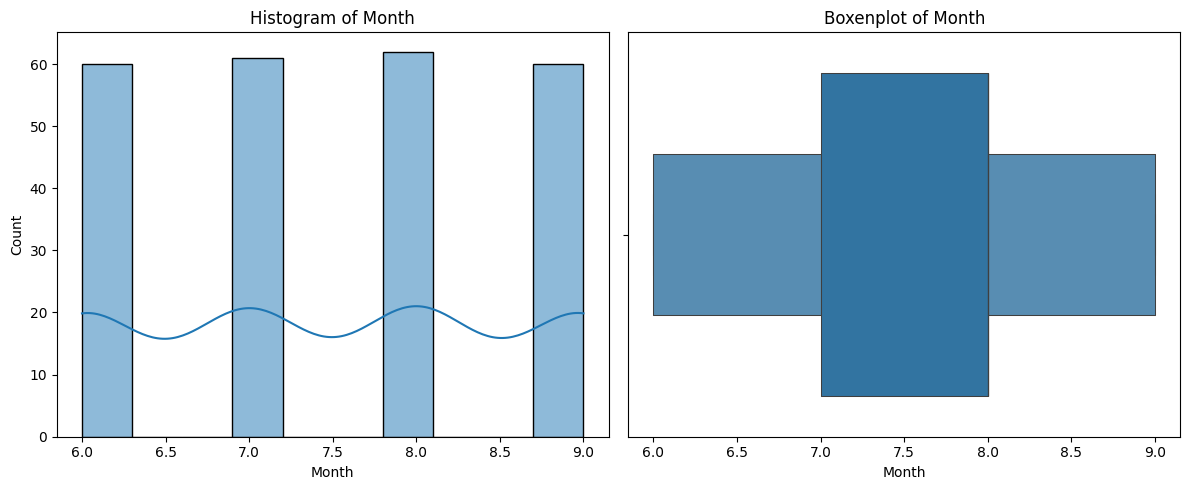

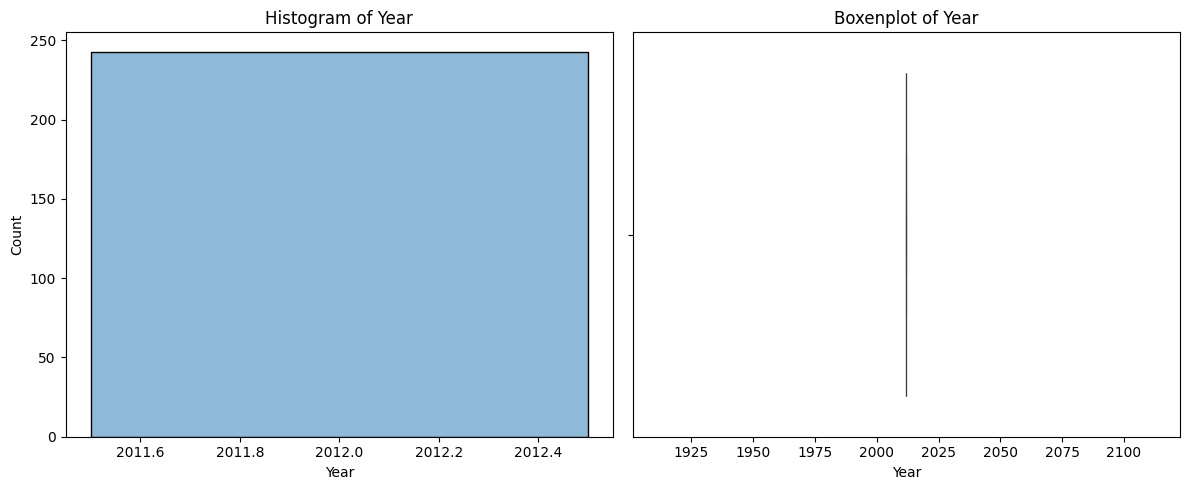

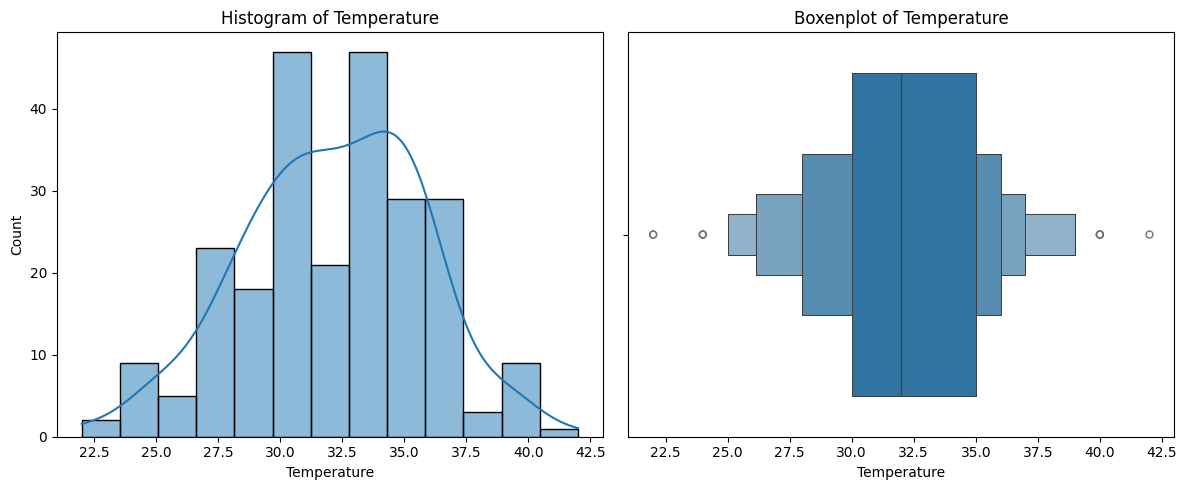

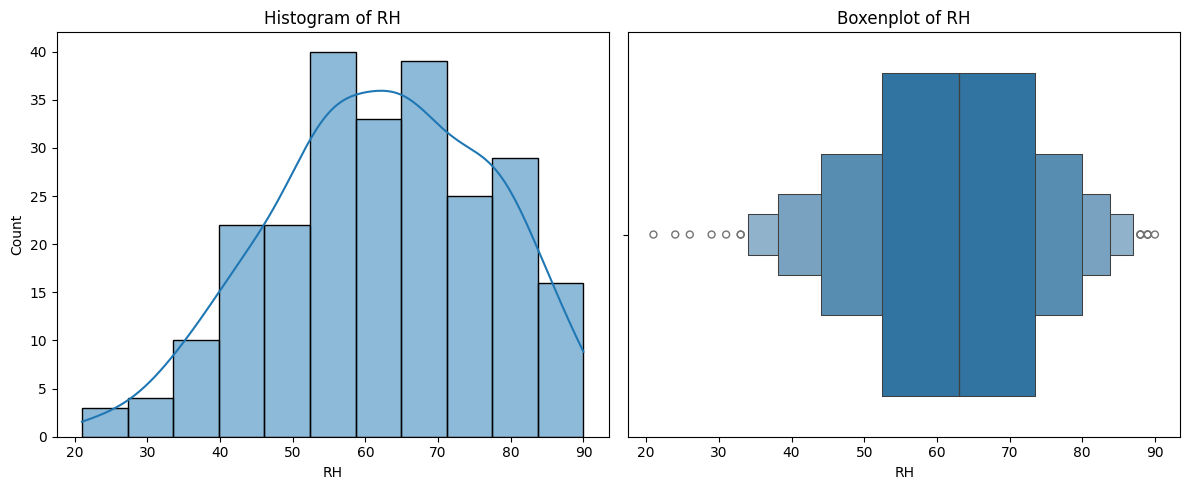

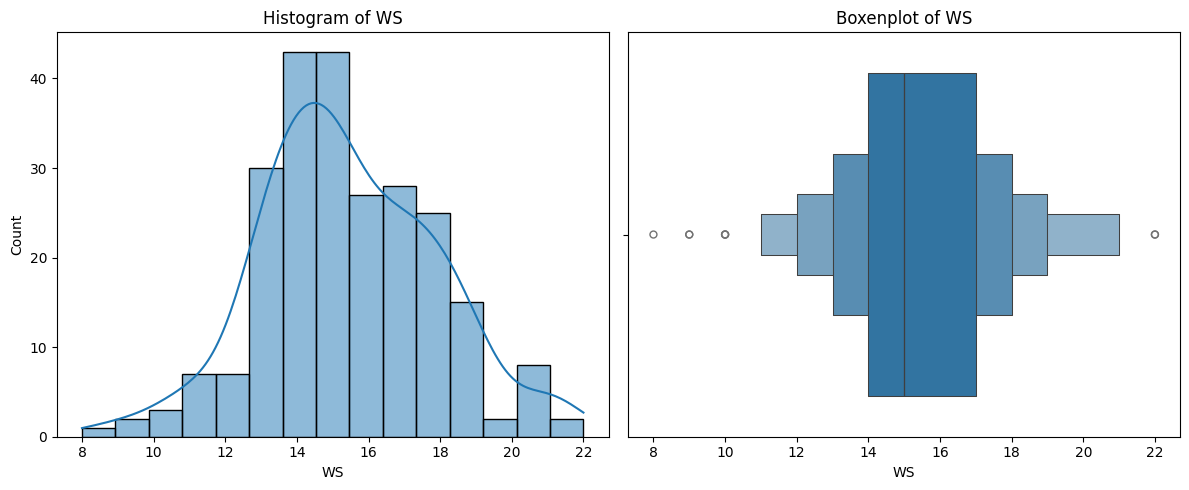

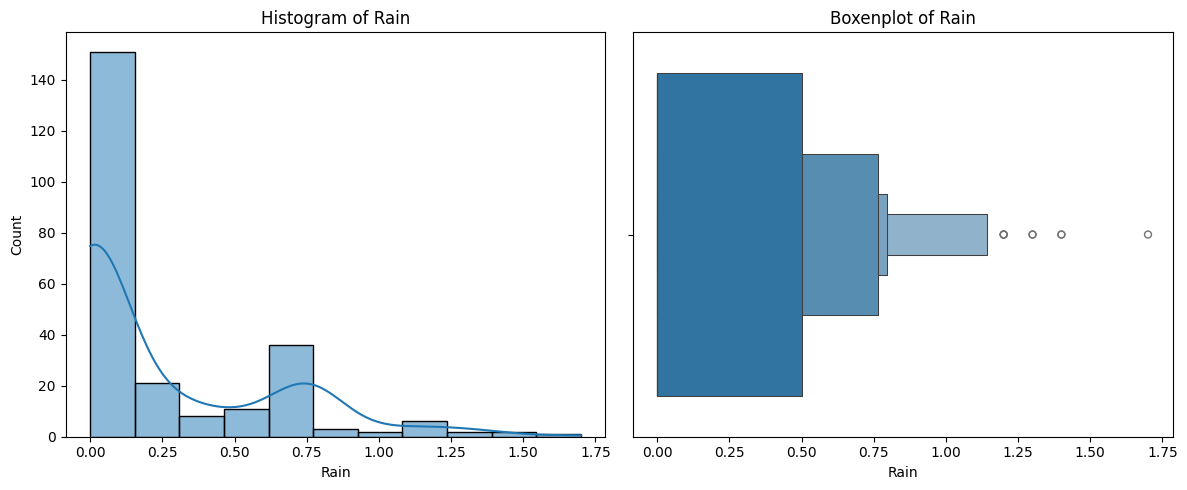

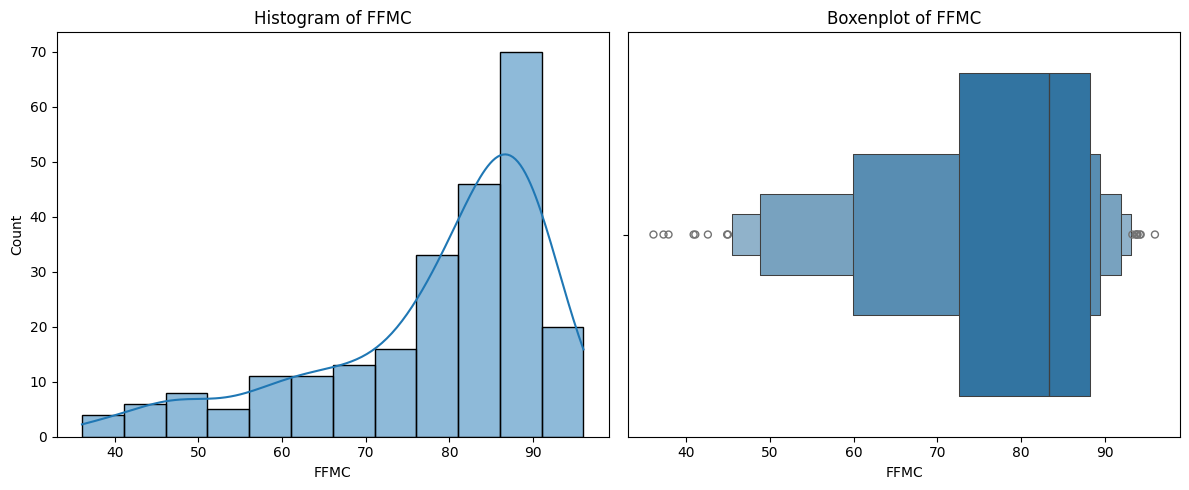

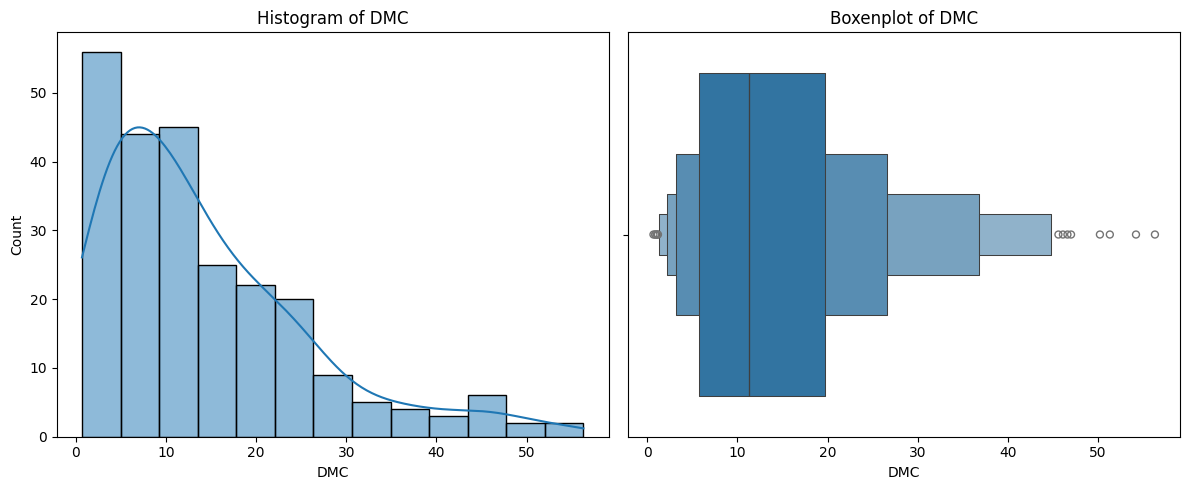

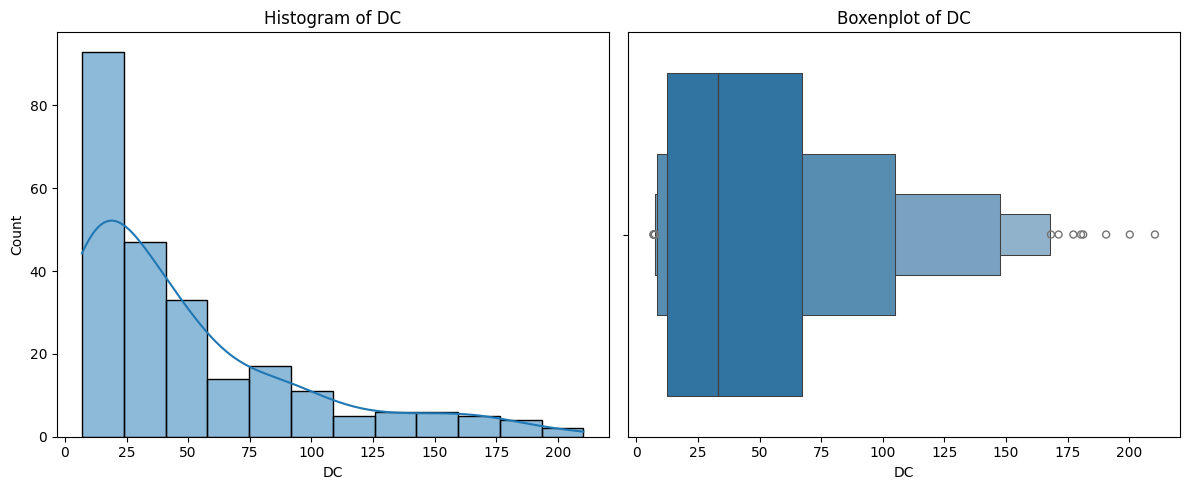

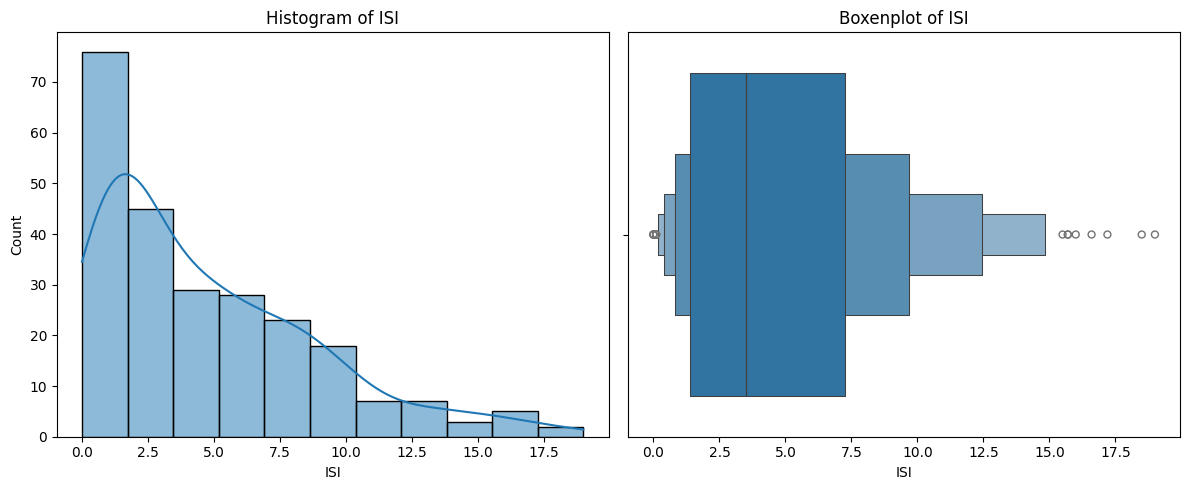

In [20]:
for i in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histogram (Distribution Plot)
    sns.histplot(df[i], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {i}')
    
    # Boxplot
    sns.boxenplot(x=df[i], ax=axes[1])
    axes[1].set_title(f'Boxenplot of {i}')

    plt.tight_layout()
    plt.show()

# C. Data Processing (Feature selection & Extraction)

## Pengecekan Kolerasi antar fitur dengan kolom target

### Melakukan mapping ke kolom target agar dapat dilakukan korelasi heatmap

In [21]:
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [22]:
mapping = {'fire' : 1, 'not fire' : 0}
df['Classes'] = df['Classes'].map(mapping)
df.head()

,Day,Month,Year,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.000000,65.700000,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.300000,64.400000,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,0.762963,47.100000,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,0.762963,77.842387,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.000000,64.800000,3.0,14.2,1.2,3.9,0.5,0


### Pengecekan Heatmap 1 (Pengecekan fitur yang lemah dan kuat)

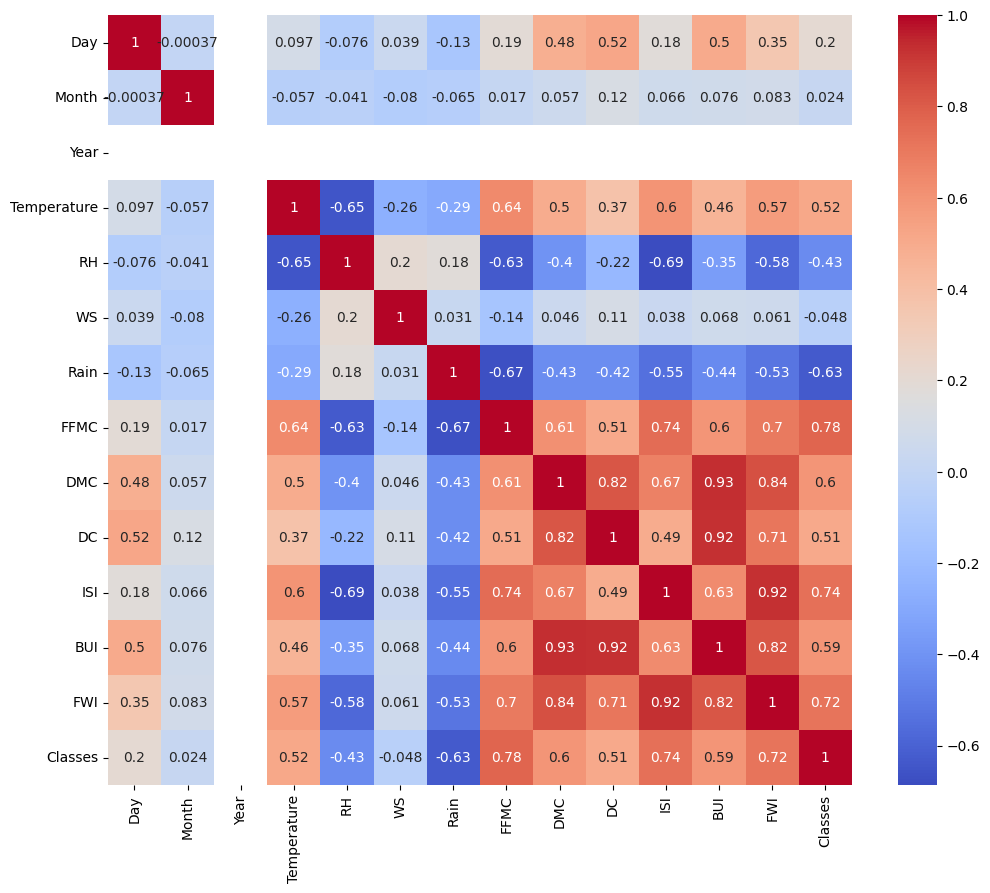

In [23]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

#### Melakukan fitur extraction berdasarkan kolom Wind speed (tidak terlalu kuat) dan temperatur (berkolerasi dengan api secara logis (Api = Panas = Temperatur naik))

##### 1. Kecepatan Evaporasi, semakin cepat angin maka semakin cepat evaporasi, semakin lembab udara, maka evaporasi akan semakin lambat (RH dihitung dalam persentase)

##### 2. Kelembapan berdasarkan suhu, jika kelembapan tinggi, maka akan mudah untuk mendinginkan suatu benda.

In [24]:
df['ER'] = df['WS'] * (100 - df['RH']) # Evaporation Rate (Kecepatan Evaporasi air berdasarkan kelembapan lingkungan dan kecepatan angin)
df['HAT'] = df['Temperature'] * (1- df['RH']/100) # Humidity Adjusted temperature (Penggabungan suhu Berdasarkan kelembapan)

df_feat = df.copy(deep=True) # Menduplikat dataframe ke dataframe_feature untuk lebih mudah menyaring fitur untuk dipakai & untuk tidak mengganggu dataframe original
df_feat.drop(columns='WS',inplace=True)
df_feat.drop(columns=['Day','Month','Year'],inplace=True)

In [25]:
df_feat.head()

,Temperature,RH,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,ER,HAT
0,29,57,0.000000,65.700000,3.4,7.6,1.3,3.4,0.5,0,774,12.47
1,29,61,1.300000,64.400000,4.1,7.6,1.0,3.9,0.4,0,507,11.31
2,26,82,0.762963,47.100000,2.5,7.1,0.3,2.7,0.1,0,396,4.68
3,25,89,0.762963,77.842387,1.3,6.9,0.0,1.7,0.0,0,143,2.75
4,27,77,0.000000,64.800000,3.0,14.2,1.2,3.9,0.5,0,368,6.21


### Pengecekan Heatmap 2 (Setelah membuat fitur baru dan melakukan drop ke kolom wind speed dan yang berhubungan dengan waktu)

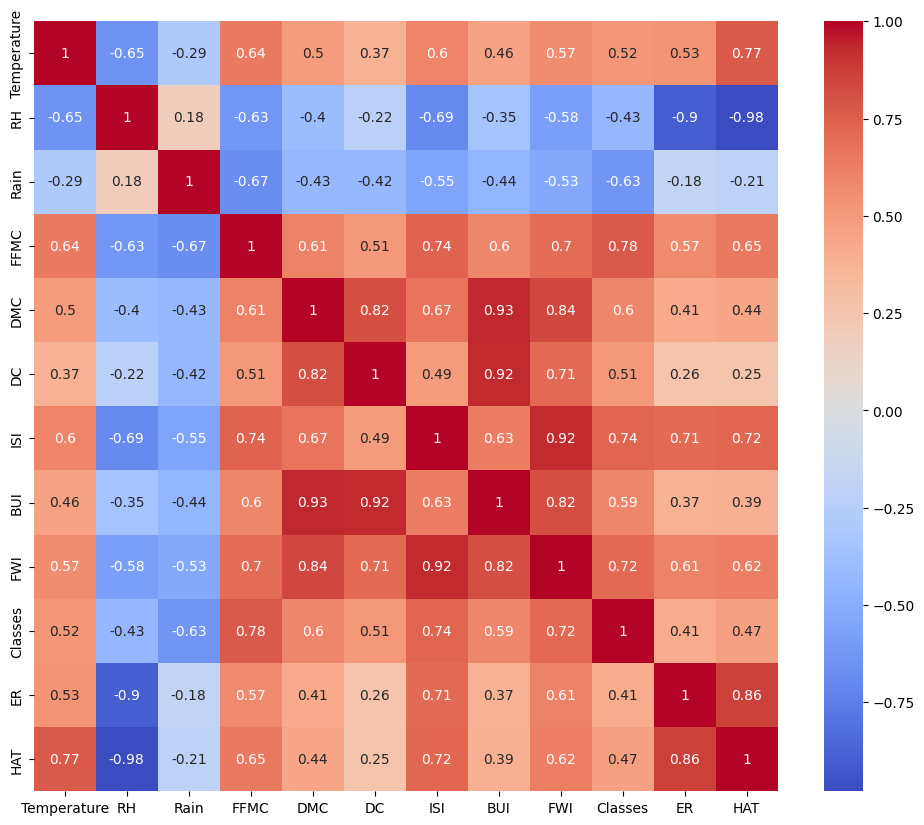

In [26]:
plt.figure(figsize=(12,10))
sns.heatmap(df_feat.corr(),annot=True,cmap='coolwarm')
plt.show()

#### Menghapus kolom yang memiliki korelasi tinggi (Jika ada kolom yang berkolerasi tinggi, akan mengurangi informasi yang dapat diberikan ke algoritma K-Means)

In [27]:
df_feat.drop(columns=['BUI','FFMC','FWI','DC'],inplace=True)

### Pengecekan Heatmap 3 (Setelah melakukan drop ke kolom yang berkorelasi tinggi terhadap satu sama lain)

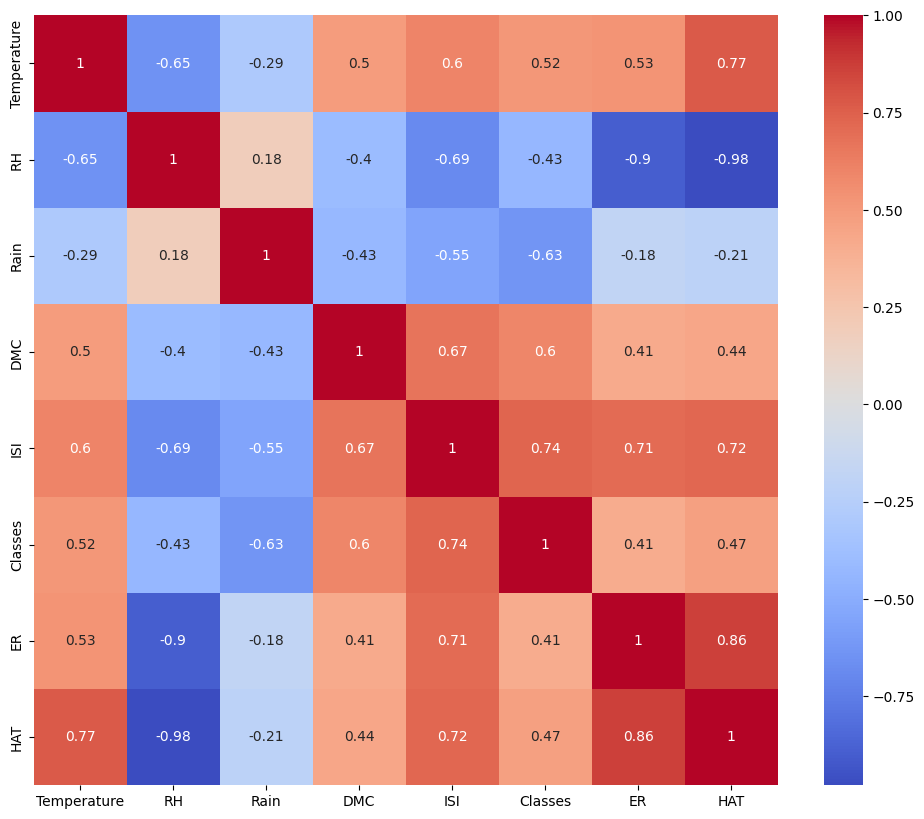

In [28]:
plt.figure(figsize=(12,10))
sns.heatmap(df_feat.corr(),annot=True,cmap='coolwarm')
plt.show()

### Menghilangkan kolom target untuk proses clustering

In [29]:
df_feat.drop(columns='Classes')

,Temperature,RH,Rain,DMC,ISI,ER,HAT
0,29,57,0.000000,3.4,1.3,774,12.47
1,29,61,1.300000,4.1,1.0,507,11.31
2,26,82,0.762963,2.5,0.3,396,4.68
3,25,89,0.762963,1.3,0.0,143,2.75
4,27,77,0.000000,3.0,1.2,368,6.21
...,...,...,...,...,...,...,...
241,30,65,0.000000,16.0,4.5,490,10.50
242,28,87,0.762963,6.5,0.1,195,3.64
243,27,87,0.500000,3.5,0.4,195,3.51
244,24,54,0.100000,4.3,1.7,828,11.04


In [30]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 245
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Rain         243 non-null    float64
 3   DMC          243 non-null    float64
 4   ISI          243 non-null    float64
 5   Classes      243 non-null    int64  
 6   ER           243 non-null    int64  
 7   HAT          243 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 17.1 KB


# D. Modelling

In [31]:
np.random.seed(42)
shuffled_indices = np.random.permutation(len(df))

test_set_size = int(len(df) * 0.2)
test_indices = shuffled_indices[:test_set_size]
train_indices = shuffled_indices[test_set_size:]

x = df_feat

x_train = x.iloc[train_indices]
x_test = x.iloc[test_indices]

min_vals = x_train.min(axis=0)
max_vals = x_train.max(axis=0)

def min_max_scale(data, min_vals, max_vals):
    range_val = max_vals - min_vals
    range_val[range_val == 0] = 1
    return (data - min_vals) / (range_val)
    
x_train_scaled = min_max_scale(x_train, min_vals, max_vals)
x_test_scaled = min_max_scale(x_test, min_vals, max_vals)

In [32]:
minim = df_feat.min()
maxim = df_feat.max()
ranger = maxim - minim
df_feat_scaled = (df_feat - minim) / (maxim - minim)

In [33]:
class CustomKMeans:
    def __init__(self, n_clusters, max_iter=300, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        if random_state:
            np.random.seed(random_state)
        self.centroids = None
        self.labels_ = None
        self.inertia_ = None

    def fit(self, X):
        n_samples, n_features = X.shape
        self.centroids = X[np.random.choice(n_samples, self.n_clusters, replace=False)]
        for i in range(self.max_iter):
            old_centroids = self.centroids.copy()
            self.labels_ = self._assign_clusters(X)
            self.centroids = self._compute_centroids(X, old_centroids)
            if np.all(np.linalg.norm(self.centroids - old_centroids, axis=1) < self.tol):
                break
        self.inertia_ = self._compute_inertia(X)

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _compute_centroids(self, X, old_centroids):
        centroids = np.array([X[self.labels_ == i].mean(axis=0) if np.any(self.labels_ == i) else old_centroids[i] for i in range(self.n_clusters)])
        return centroids

    def _compute_inertia(self, X):
        return np.sum((X - self.centroids[self.labels_]) ** 2)
    
    def predict(self, X):
        return self._assign_clusters(X)

In [34]:
sse = []
k_values = range(1, 11)

for k in k_values:
    kmeans = CustomKMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_train_scaled.values)
    sse.append(kmeans.inertia_)

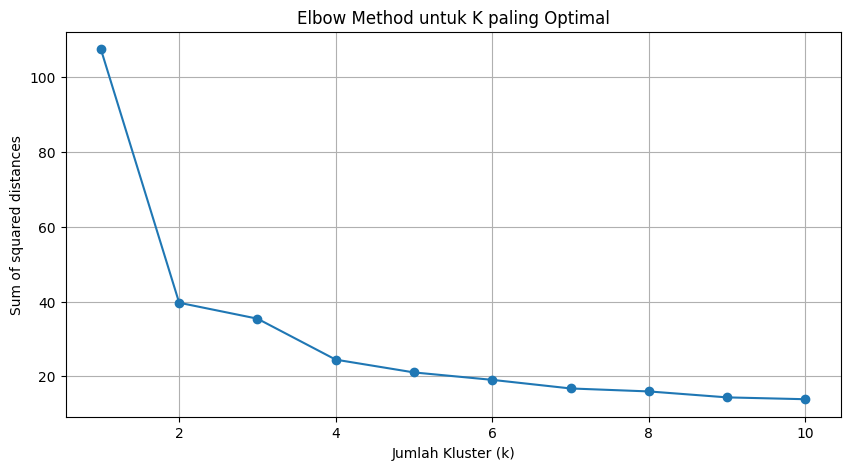

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Jumlah Kluster (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method untuk K paling Optimal')
plt.grid(True)
plt.show()

In [36]:
model = CustomKMeans(n_clusters=3, random_state=42)
model.fit(df_feat_scaled.values)
print(model.inertia_)

35.81253294777226


In [37]:
df['Cluster'] = model.labels_

In [38]:
df.groupby('Cluster').mean()

,Day,Month,Year,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,ER,HAT
Cluster,,,,,,,,,,,,,,,,
0,17.419753,7.530864,2012.0,32.419753,65.555556,15.234568,0.020988,85.885185,18.154321,68.474074,5.454321,21.618519,8.698765,1.0,517.024691,11.238272
1,17.214286,7.517857,2012.0,35.785714,43.196429,15.446429,0.091534,89.921429,23.495738,71.152337,10.271429,25.665733,16.121429,1.0,871.160714,20.389643
2,13.726415,7.471698,2012.0,30.028302,69.311321,15.566038,0.519462,66.226271,6.446226,21.790566,1.277358,7.220755,0.964151,0.0,469.830189,9.418962


In [39]:
df['Cluster'].value_counts()

Cluster
2    106
0     81
1     56
Name: count, dtype: int64

# E. Visualisasi Akhir

## Heatmap untuk mengecek korelasi antar fitur dengan cluster

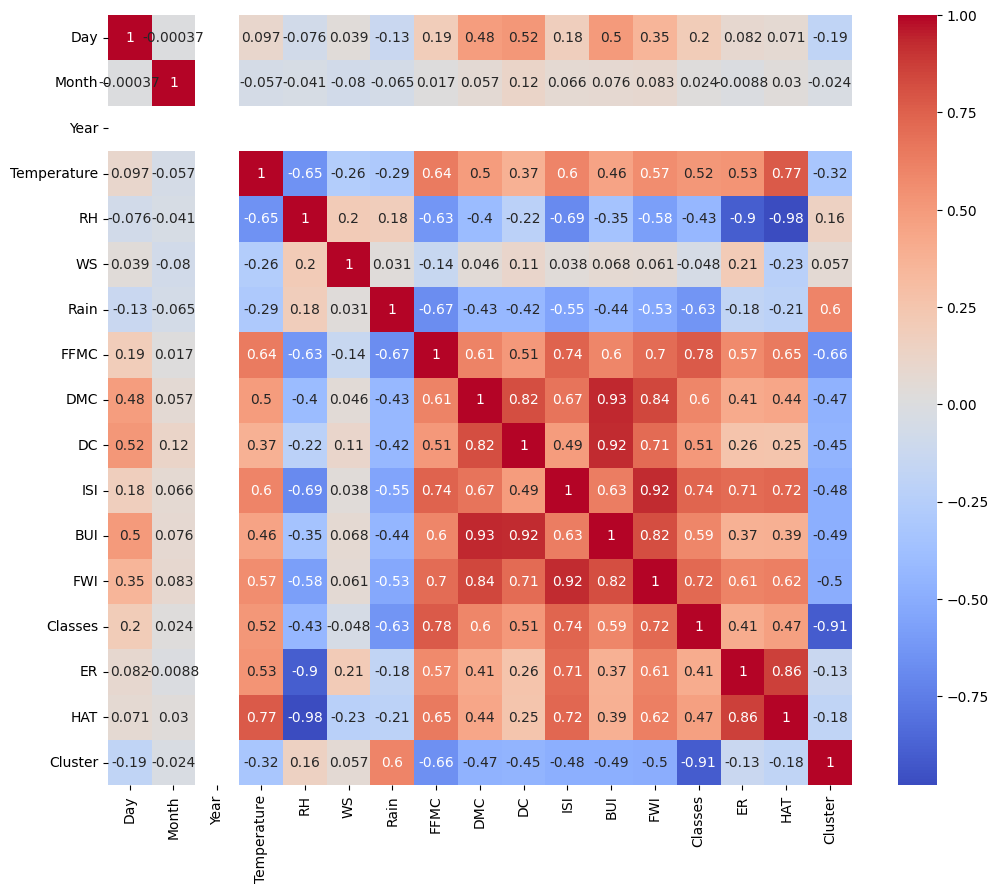

In [40]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [41]:
cluster_mapping = {0: 'Tinggi', 1: 'Sedang', 2: 'Rendah'}
df['Cluster'] = df['Cluster'].map(cluster_mapping)

## Bar Chart Persebaran Tingkat Keparahan Kebakaran

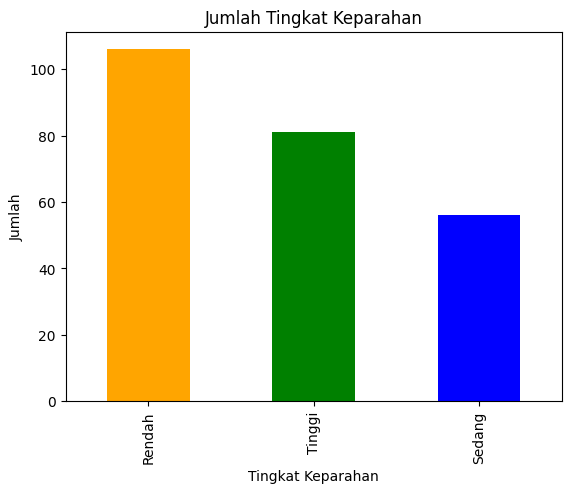

In [42]:
cluster_counts = df['Cluster'].value_counts()
cluster_counts.plot(kind='bar', color=['orange', 'green', 'blue'])
plt.xlabel('Tingkat Keparahan')
plt.ylabel('Jumlah')
plt.title('Jumlah Tingkat Keparahan')
plt.show()

## Bar Chart perbandingan class di setiap bulan (1 = Kebakaran(Kuning), 0 = tidak(Biru)) | Studi Kasus 2

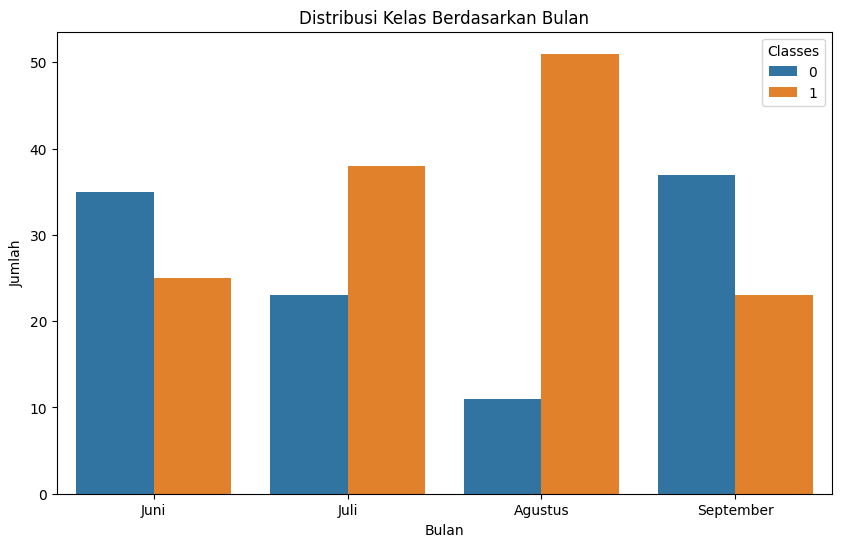

In [43]:
# Membuat mapping untuk bulan
month_mapping = {6: 'Juni', 7: 'Juli', 8: 'Agustus', 9: 'September'}

# Membuat kolom baru dengan nilai bulan yang diubah
df['Month_Name'] = df['Month'].map(month_mapping)

# Visualisasi kolom Month_Name dan Classes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month_Name', hue='Classes')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.title('Distribusi Kelas Berdasarkan Bulan')
plt.show()

## Bar Chart Persebaran Kebakaran Secara Umum

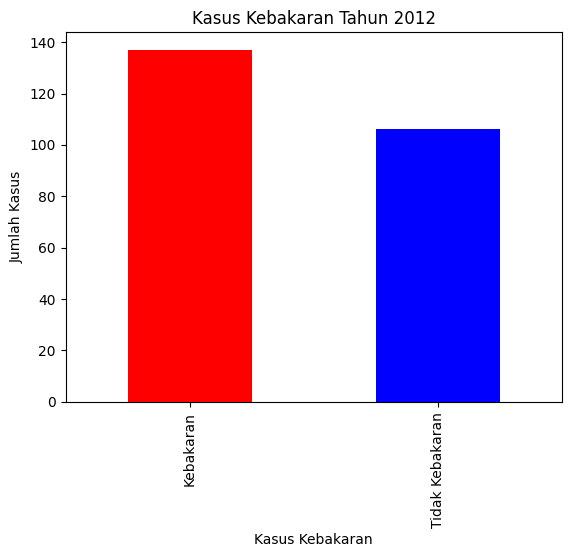

In [44]:
fire = {0: 'Tidak Kebakaran', 1: 'Kebakaran'}
df['Class_name'] = df['Classes'].map(fire)

df['Class_name'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.xlabel('Kasus Kebakaran')
plt.ylabel('Jumlah Kasus')
plt.title('Kasus Kebakaran Tahun 2012')
plt.show()